<a href="https://colab.research.google.com/github/pravinkucha/Deep-Learning/blob/master/TimeSeries_univariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
import numpy as np

#Data splite dependent and independent
def fn_prepare_data(data,step):
  X,y = [],[]
  for i in range(len(data)):
    idx_end = step + i
    if idx_end > len(data)-1 :
      break;
    x_seq,y_seq = data[i:idx_end],data[idx_end]
    X.append(x_seq)
    y.append(y_seq)
  return np.array(X),np.array(y)

Using TensorFlow backend.


In [2]:
#Input sequent data define
#TimeSeries_data = [110,125,133,146,158,172,187,196,210]
TimeSeries_data = [105,112,120,135,150,170,185,197,210,230]
#Define Time step
step = 3
#Define Feature
n_feature = 1
#Splite data into independent and dependent
X , y = fn_prepare_data(TimeSeries_data,step)
print(X)
print(X.shape)
print(y)
print(y.shape)



[[105 112 120]
 [112 120 135]
 [120 135 150]
 [135 150 170]
 [150 170 185]
 [170 185 197]
 [185 197 210]]
(7, 3)
[135 150 170 185 197 210 230]
(7,)


In [3]:
#reshape input data in [samples,step,feature]
X = X.reshape(X.shape[0],X.shape[1],n_feature)
X.shape

(7, 3, 1)

In [0]:
#Build LSTM Modle
obj_model = Sequential()
obj_model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(step,n_feature)))
obj_model.add(LSTM(50,activation='relu'))
obj_model.add(Dense(1))
obj_model.compile(optimizer='adam',loss='mse')
obj_model.fit(X,y,epochs=300,verbose=1)

In [5]:
#Predication for next 10 days data
x_input = np.array([197,210,230])
predct_data = []
temp_input = list(x_input)
i = 0
while i < 10 :
  if len(temp_input) > 3:
    #Format 
    x_input = np.array(temp_input[i:])
    print(x_input)
    x_input = x_input.reshape(1,step,n_feature)
    y_pred  = obj_model.predict(x_input)
    predct_data.append(int(y_pred[0][0]))
    temp_input.append(int(y_pred[0][0]))   
  else:
    print(x_input)
    x_input = x_input.reshape(1,step,n_feature)
    y_pred  = obj_model.predict(x_input)
    predct_data.append(int(y_pred[0][0]))
    temp_input.append(int(y_pred[0][0]))
  i+=1
print(predct_data)
print(temp_input)

[197 210 230]
[210 230 243]
[230 243 261]
[243 261 281]
[261 281 299]
[281 299 321]
[299 321 344]
[321 344 367]
[344 367 394]
[367 394 422]
[243, 261, 281, 299, 321, 344, 367, 394, 422, 451]
[197, 210, 230, 243, 261, 281, 299, 321, 344, 367, 394, 422, 451]


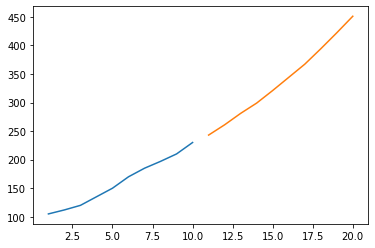

In [8]:
#Plot The data in Matplot graph
import matplotlib.pyplot as plt
day_data = range(1,11)
day_pred = range(11,21)
plt.plot(day_data,TimeSeries_data)
plt.plot(day_pred,predct_data)
plt.show()